In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('dataframe/champions.csv')

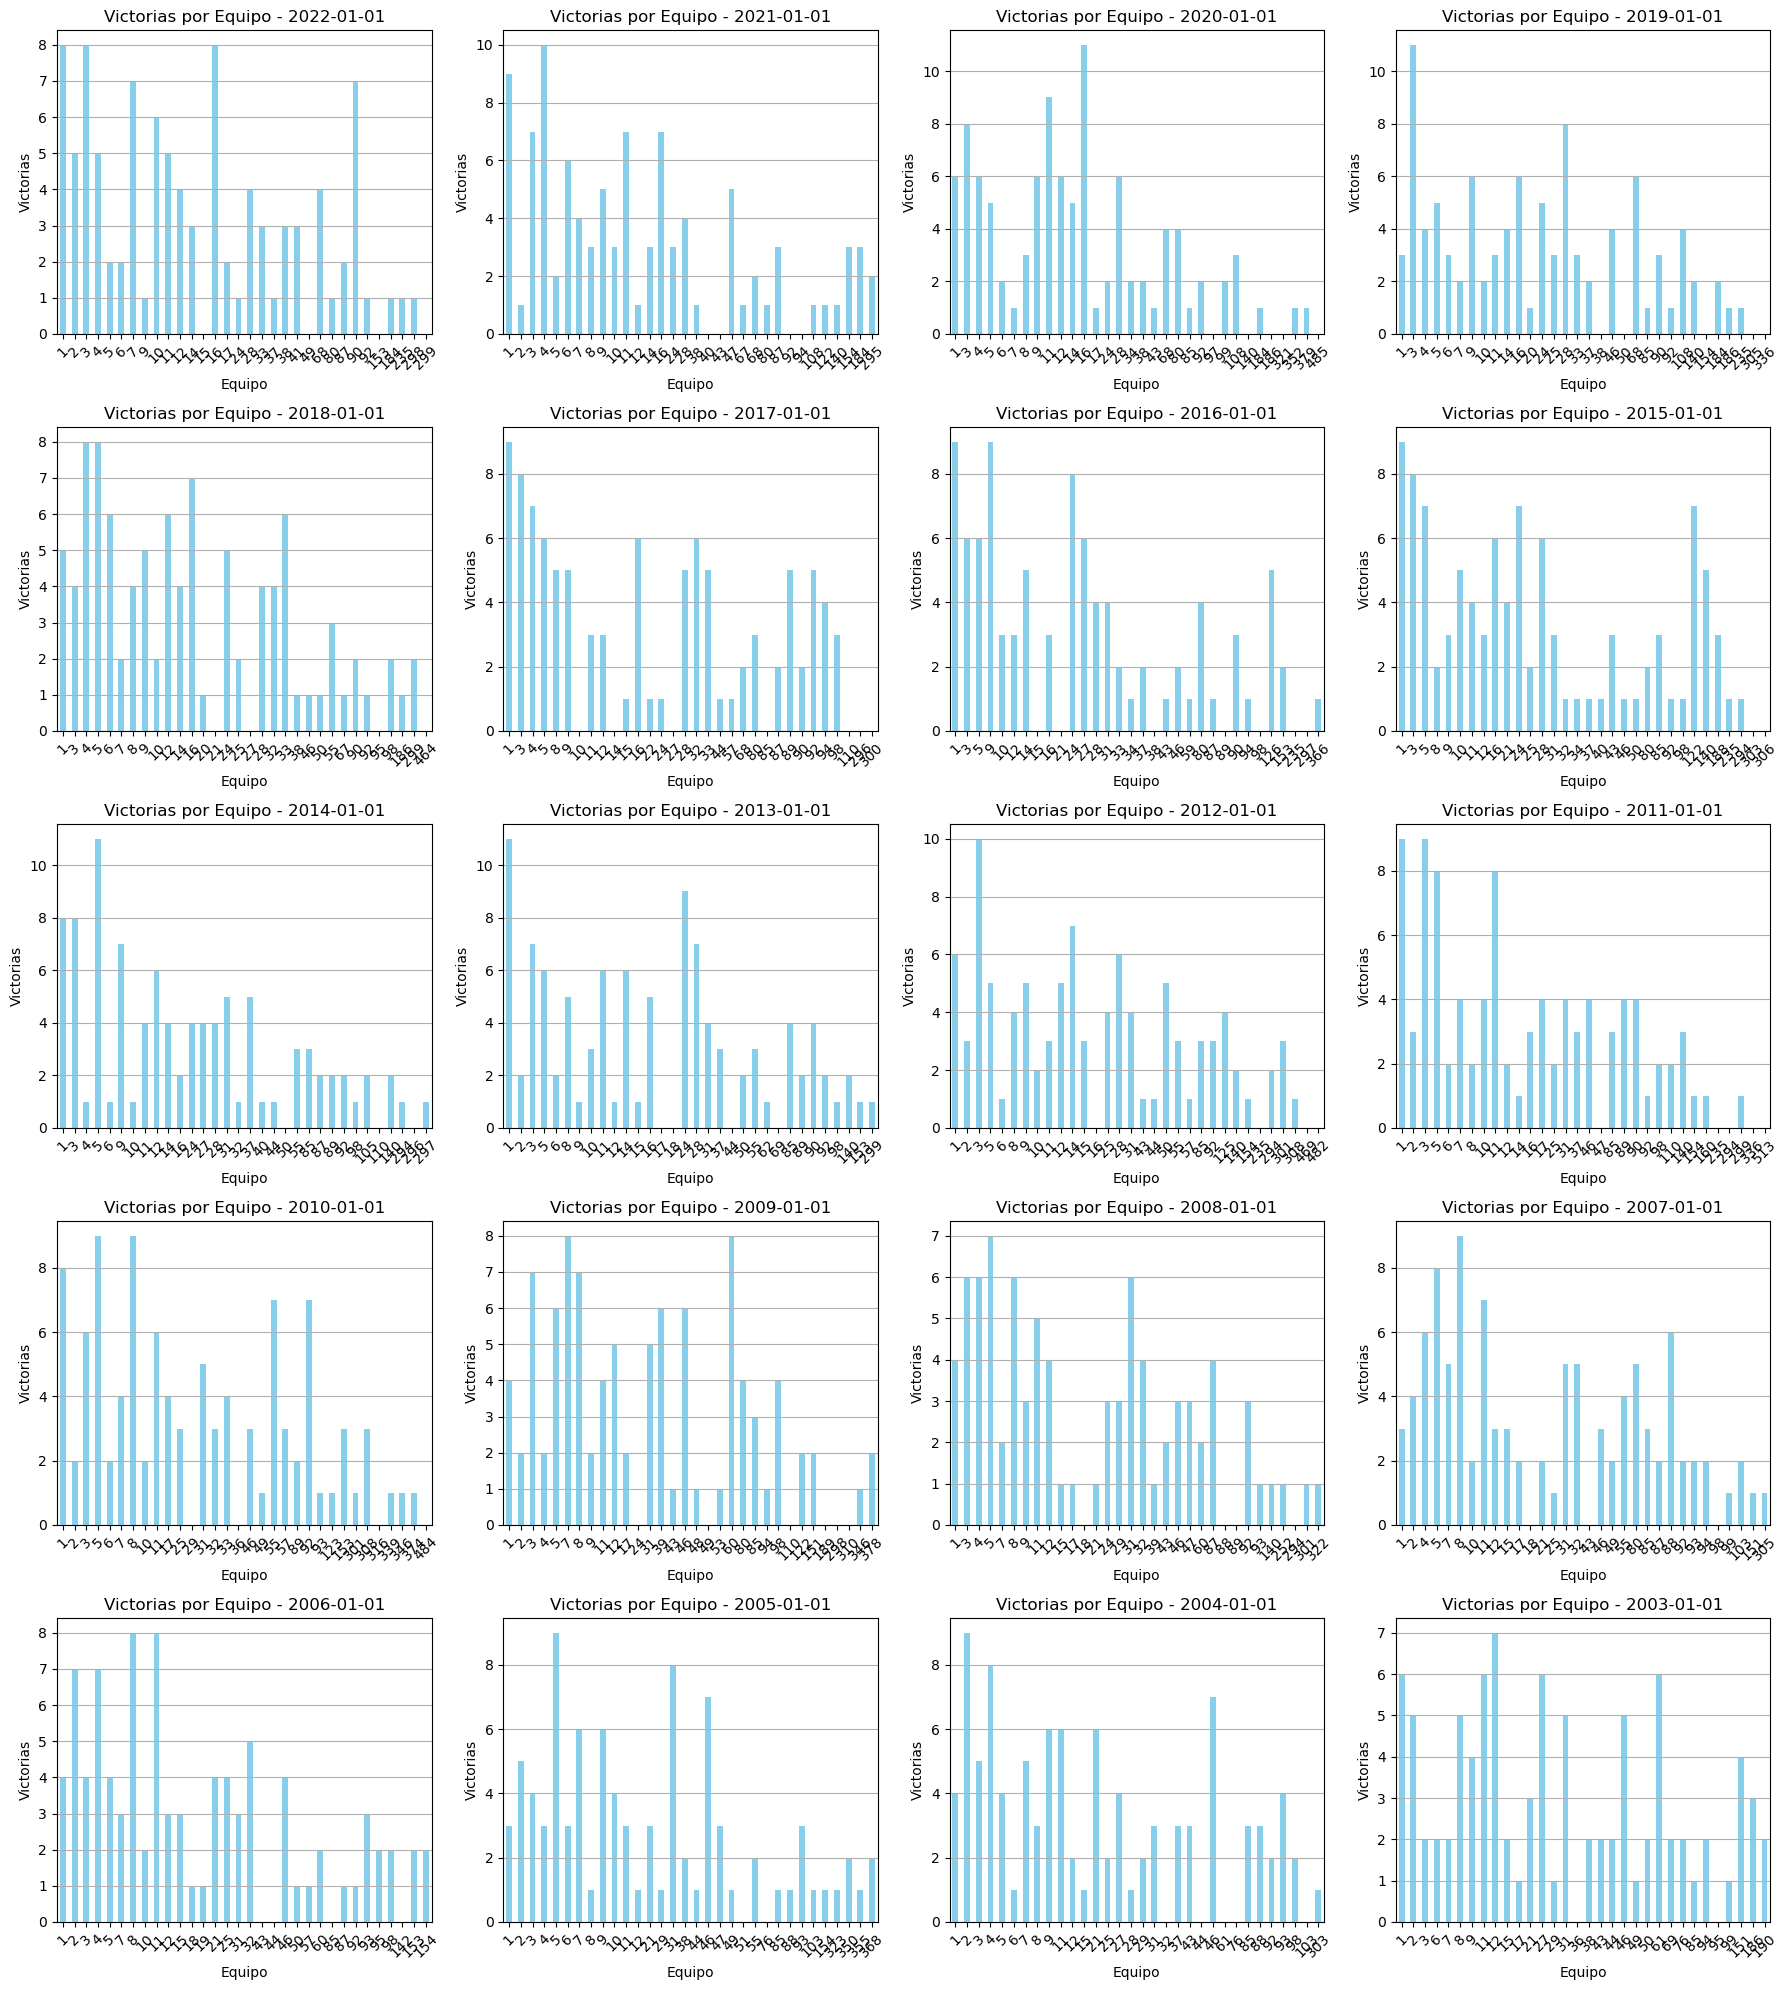

In [9]:
# Obtener el número de temporadas
num_temporadas = len(data['Temporada'].unique())

num_filas = (num_temporadas + 2) // 4

# Definir el tamaño de cada gráfico
fig, axes = plt.subplots(nrows=num_filas, ncols=4, figsize=(18, 4*num_filas))

# Iterar sobre cada temporada y crear un histograma para el número de victorias de cada equipo
for i, temporada in enumerate(data['Temporada'].unique()):
    temporada_data = data[data['Temporada'] == temporada]
    victorias_por_equipo = temporada_data.groupby('Local')['VictoriaLocal'].sum() + temporada_data.groupby('Visitante')['VictoriaVisitante'].sum()
    
    # Obtener la fila y la columna correspondientes en la matriz de subtramas
    fila = i // 4
    columna = i % 4
    
    # Crear el histograma en la subtrama correspondiente
    victorias_por_equipo.plot(kind='bar', ax=axes[fila, columna], color='skyblue')
    axes[fila, columna].set_title(f'Victorias por Equipo - {temporada}')
    axes[fila, columna].set_xlabel('Equipo')
    axes[fila, columna].set_ylabel('Victorias')
    axes[fila, columna].tick_params(axis='x', rotation=45)
    axes[fila, columna].grid(axis='y')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la tabla de histogramas
plt.show()


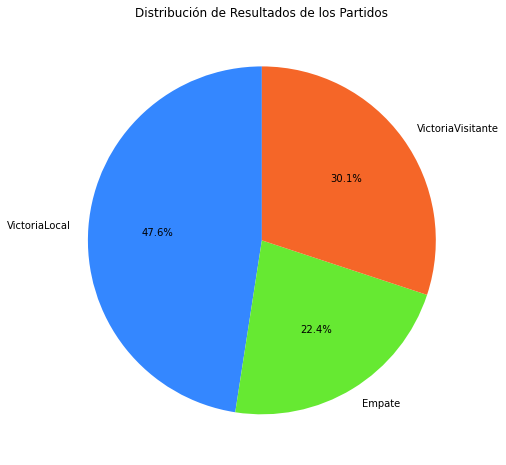

In [6]:
#Gráfico circular de resultados de los partidos
match_outcomes = data[['VictoriaLocal', 'Empate', 'VictoriaVisitante']].sum()
match_outcomes.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=90, colors=['#3487FF', '#66E932', '#F56628'])
plt.title('Distribución de Resultados de los Partidos')
plt.ylabel('')
plt.show()

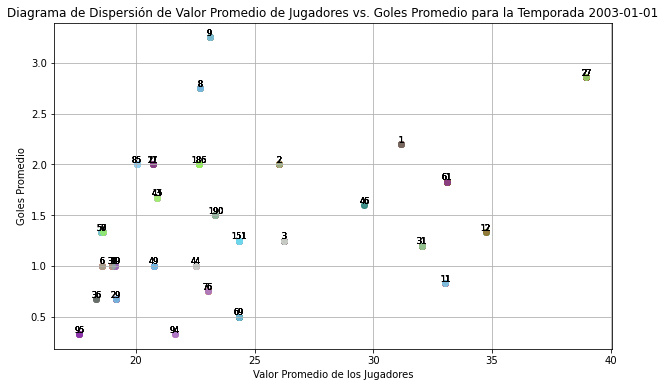

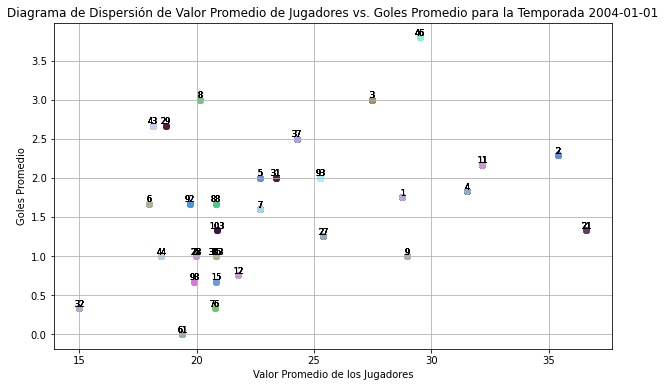

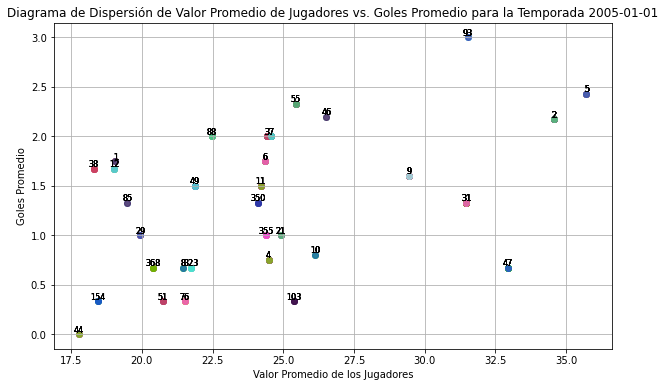

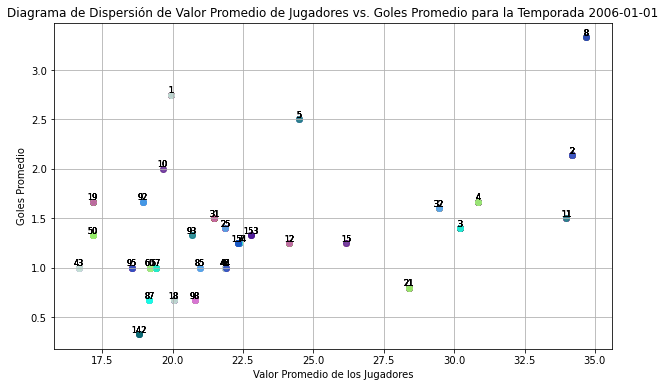

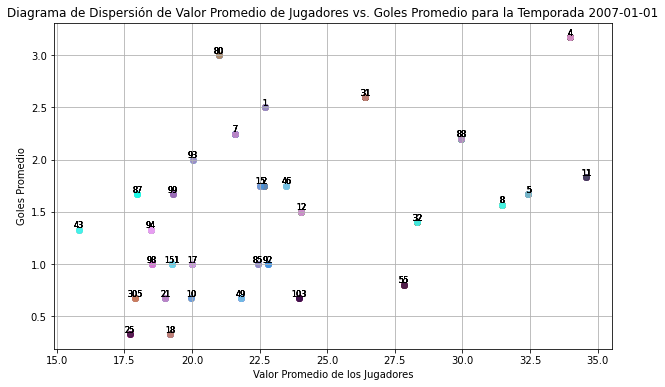

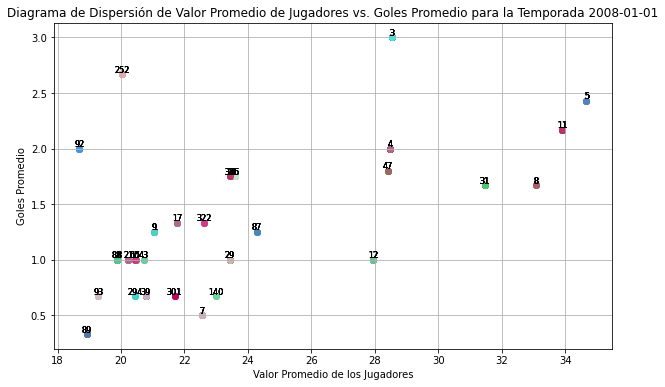

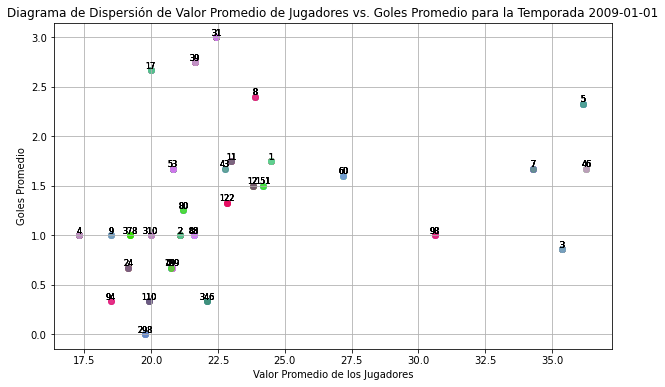

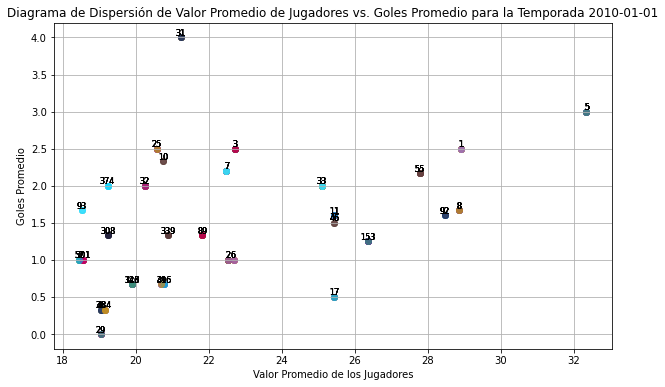

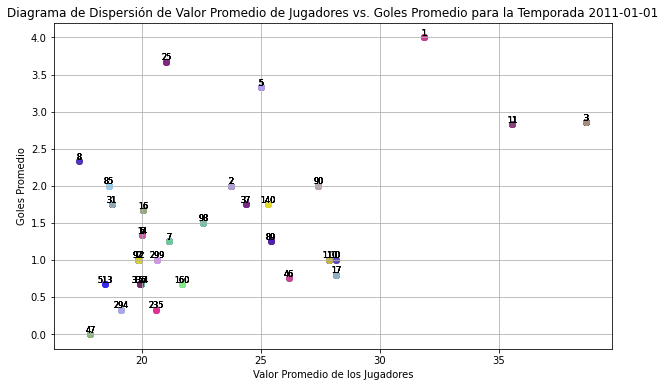

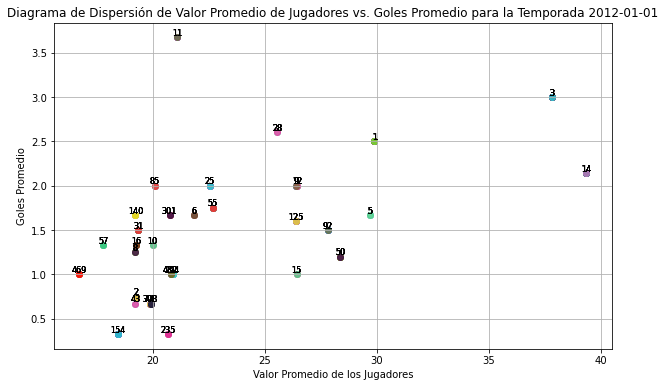

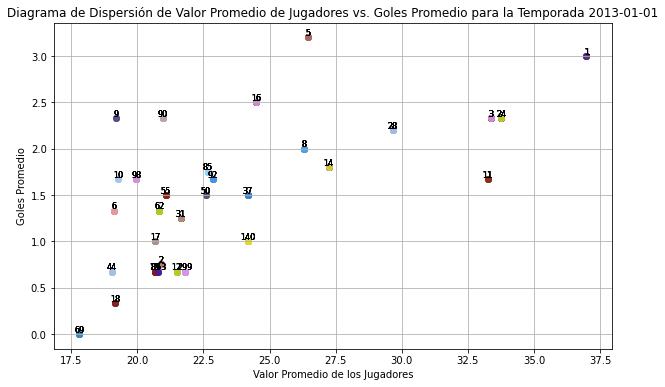

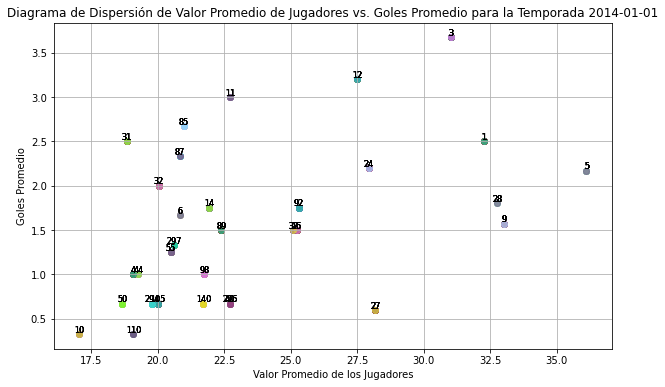

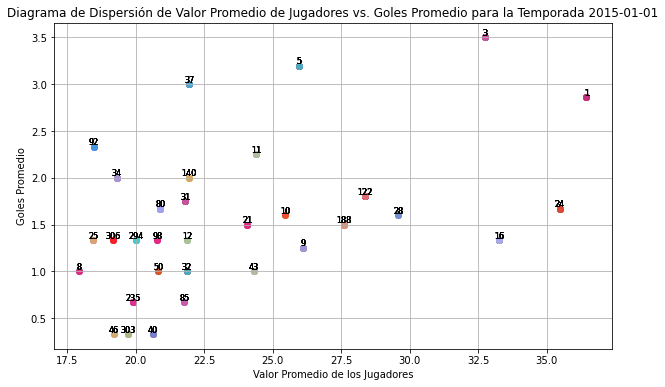

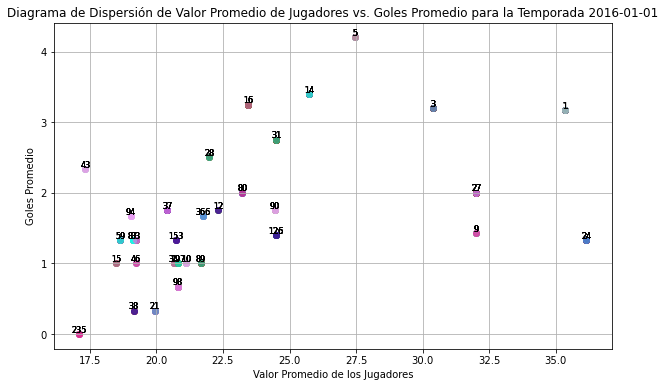

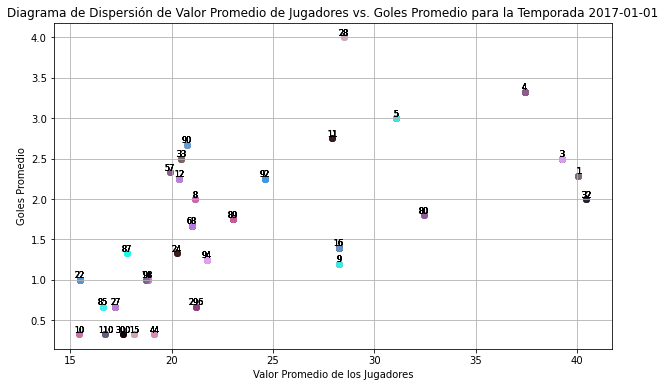

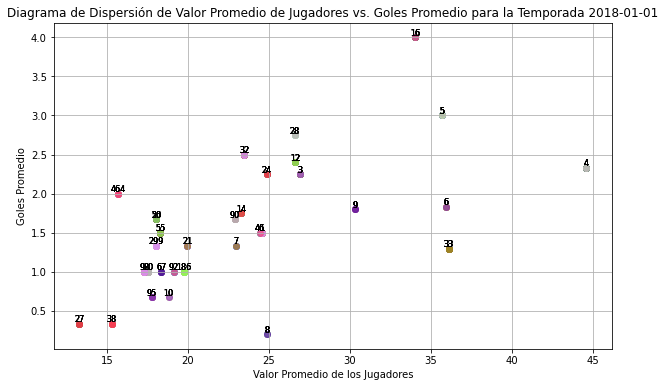

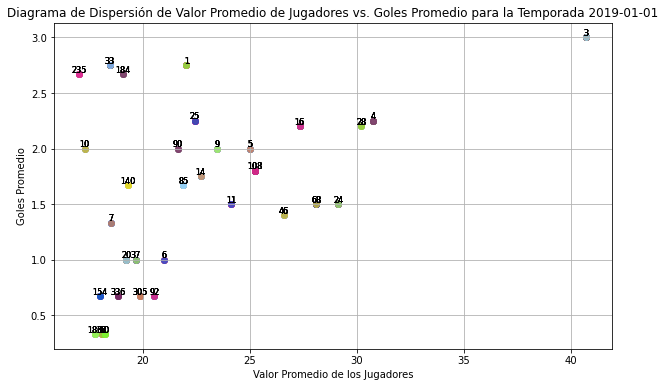

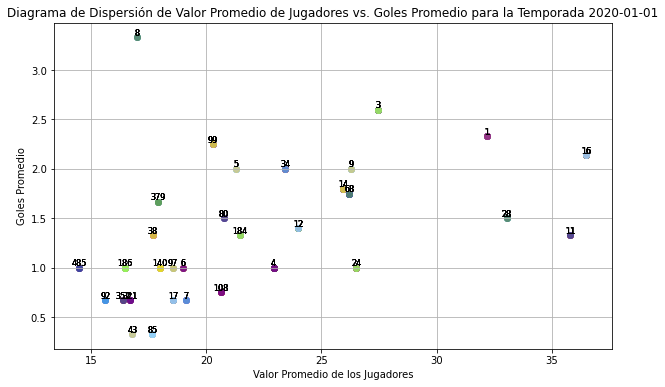

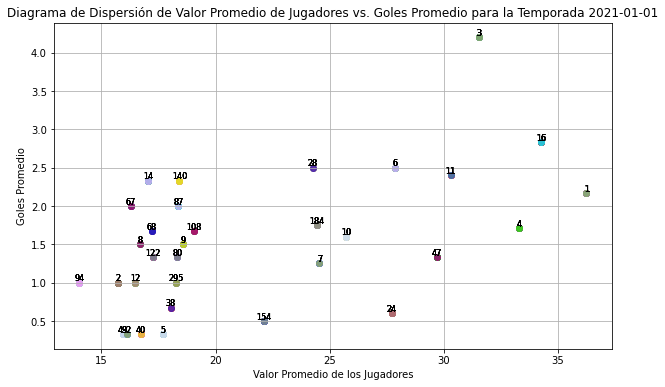

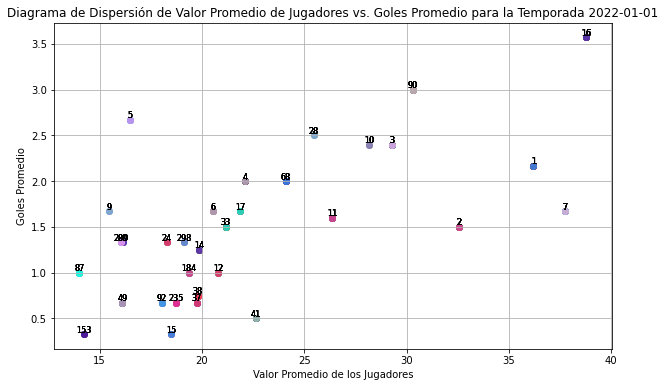

In [8]:
import numpy as np

# Obtener una lista de colores únicos para cada equipo
colores = np.random.rand(len(data['Local'].unique()), 3)  # Genera colores aleatorios en formato RGB

# Obtener una lista ordenada de nombres de equipos únicos
equipos_unicos = sorted(data['Local'].unique())

# Obtener una lista de temporadas únicas
temporadas_unicas = sorted(data['Temporada'].unique())

# Lista para almacenar nombres de equipos y colores
equipos_legend = []

# Crear un diagrama de dispersión para cada temporada
for temporada in temporadas_unicas:
    plt.figure(figsize=(10, 6))
    plt.title(f'Diagrama de Dispersión de Valor Promedio de Jugadores vs. Goles Promedio para la Temporada {temporada}')
    plt.xlabel('Valor Promedio de los Jugadores')
    plt.ylabel('Goles Promedio')
    plt.grid(True)
    
    for equipo, color in zip(equipos_unicos, colores):
        equipo_data = data[((data['Local'] == equipo) | (data['Visitante'] == equipo)) & (data['Temporada'] == temporada)]
        plt.scatter(equipo_data['1_MediaJugadores'], equipo_data['1_Media_Goles_PP'], label=equipo, alpha=0.7, color=color)
        for index, row in equipo_data.iterrows():
            plt.text(row['1_MediaJugadores'], row['1_Media_Goles_PP'], str(row['Local']), fontsize=8, ha='center', va='bottom')
        if equipo not in equipos_legend:  # Añadir el equipo a la lista si aún no está presente
            equipos_legend.append(equipo)


plt.show()


<Figure size 720x432 with 0 Axes>

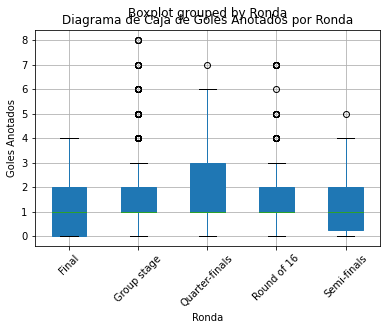

In [9]:
# Crear el diagrama de caja
plt.figure(figsize=(10, 6))
data.boxplot(column='GolesLocal', by='Ronda', patch_artist=True)
plt.title('Diagrama de Caja de Goles Anotados por Ronda')
plt.xlabel('Ronda')
plt.ylabel('Goles Anotados')
plt.xticks(rotation=45)
plt.show()